In [693]:
# araba fiyat analizi...
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow.keras.models import load_model

In [694]:
dataframe = pd.read_excel("merc.xlsx")
dataframe.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


## veriyi anlamak

In [695]:
dataframe.describe() 

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [696]:
# 13119 tane veri varmış mesela. ortalama 2017 yılında üretiilmiş arabalar. ortalama motor büyüklüğü 2.0 mesela.
dataframe.isnull().sum()  # toplam hangi kolonda kaç tnae null var görebiliriz bir seri halinde görebiliriz. 

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [697]:
dataframe.isnull().sum().sum() # komple dataframede ne kadar null var görebiliriz.

0

<Figure size 700x500 with 0 Axes>

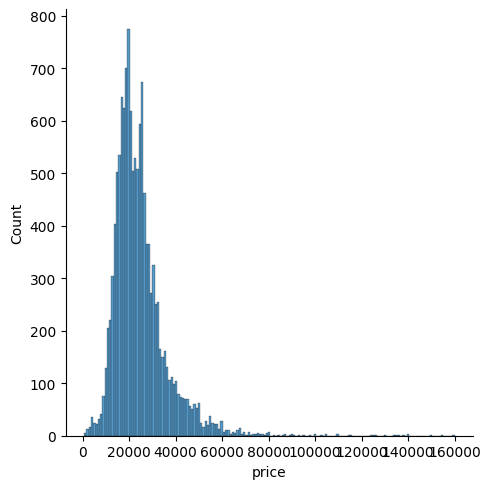

In [698]:
plt.figure(figsize=(7,5)) # seaborn matplotlib üzerine kuurulduğu için figure kullanabiliriz.
sbn.displot(dataframe["price"]) #bir dağılım grafiği çizer.
# bu grafikte satış fiyatına göre kaç adet satılmış görürüz.

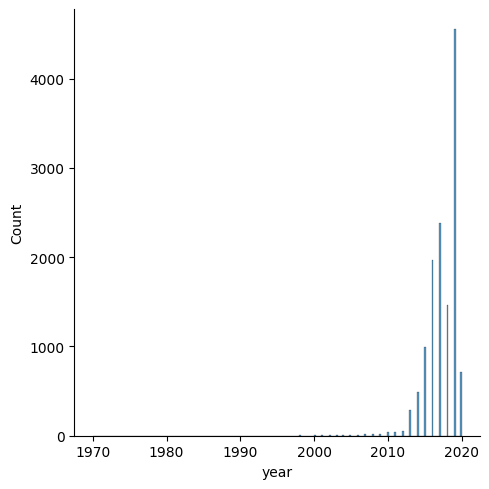

In [699]:
sbn.displot(dataframe["year"]) 

In [700]:
dataframe.corr(numeric_only=True)["price"].sort_values() # sadece fiaytla alakalı olan kısmı aldık.. ve sortvalues ile küçükten büyüğe sıraladık...
# buradan şunu görebiliriz.  mileage ne kadar fazla ise fiyat düşer. year arttıkça fiyat artar. yeni araba sonuçta.  motor büyükse fiyat artar mesela(amerikan verisi.)
# df.corr() ile verilerin birbiri ile kolerasyonunu görebiliriz birbirini nasıl etkiler görebiliriz

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

## en yüksek fiyatlı arabalar...


<Axes: xlabel='mileage', ylabel='price'>

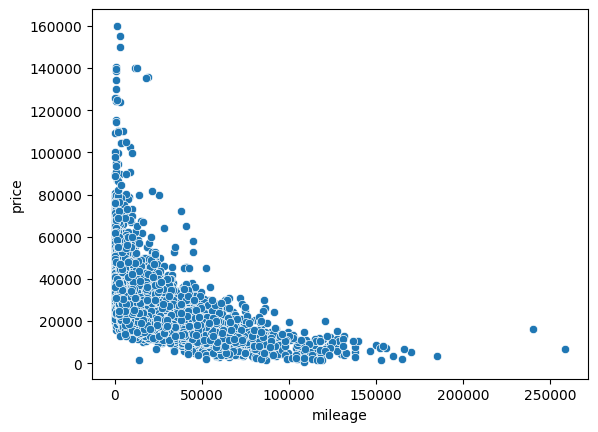

In [701]:
sbn.scatterplot(x = "mileage",y = "price",data=dataframe) # buradan mile arttıkça fiyatın düştüğünü görebiliriz 

In [702]:
dataframe.sort_values(["price"],ascending=False).head(20) # en yüksek fiyatlıdan en düşüğe doğru bize verileri getirecek.
# .head(20) ile en yüksek fiyatlı 20 arabayı gördük...

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [703]:
# çok pahalı olan az araba olduğu için grafik gereksiz uzadığı için çıkarabiliriz.
len(dataframe) # kaç adet satır var görebiliriz

13119

In [704]:
int(len(dataframe) * 0.01) # 131 adet arabayı çıkaraxağız ve daha temiz toplu bir grafik elde edeceğiz.

131

In [705]:
yoksandokuzdf = dataframe.sort_values("price",ascending=False).iloc[int(len(dataframe) * 0.01):]
dataframe = yoksandokuzdf # en büyük fiyatlı 131 arabadan kurtulduk...

<Figure size 700x500 with 0 Axes>

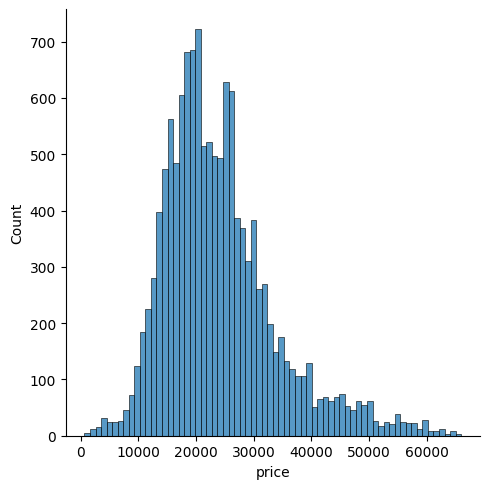

In [706]:
plt.figure(figsize=(7,5))
sbn.displot(yoksandokuzdf["price"]) # ilk 131 yüksek fiaytlı veriyi silince biz aslında grafiğin azınlık tarafını oluşturup fazladan yer kaplayan yeri silmniş olduk...


In [707]:
dataframe.groupby("year")["price"].mean() # mesela 1970'de üretilen arabaların ortalamsı 25000 pound gereksiz fazla bunu atmak lazım...

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [708]:
yenidf1 = yoksandokuzdf[yoksandokuzdf["year"] > 1970]
# yenidf1 = yoksandokuzdf[yoksandokuzdf["year"] != 1970] # bunu yaparsak eğer sadece 1970 yılında olanlar çıkar...

In [709]:
yenidf1.groupby("year")["price"].mean() # burada biz 1970 yılından sonrasını değerlendirmek için 1970'den sonrasını aldık...

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [710]:
yenidf1.head() # mesela transmission'a gerek yok düşürelim o zaman

dataframe = dataframe.drop("transmission",axis=1) # bunu düşürmemiz lazım. çünkü = string ifadeler geçersiz sayılar veriler üzerinden modeli eğitebiliriz.
dataframe.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


# MODEL OLUŞTURMAK...

In [711]:
y = dataframe["price"].values # values ile bunu numpy dizisine çevireceğiz. x değerleri y'ye gidecek. x'e göre y elde edilecel.
x = dataframe.drop("price",axis=1).values # zaten priceye gideceğiz price harici verilerle bu yüzden onu drop ettik price sutunu gitti.
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [712]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) # 0.3 ile yüzde 30u test için kullanılacak. bunu belirleriz

y_train.shape
x_test.shape
y_test.shape
x_train.shape

(9091, 5)

In [713]:
from sklearn.preprocessing import MinMaxScaler # verileri küçültmek için. belli oranlarda.
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [714]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [715]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1)) # çıkış nöronunda aktivasyn koymaya gerek yok...
model.compile(optimizer = "adam",loss = "mse")


In [716]:
model.fit(x = x_train,y=y_train,epochs=300,validation_data=(x_test,y_test),batch_size=250) # epochs çok olursa overfiting olabilir. dikkat etmek lazım .nöronlar elde olan problemi çözmek yerine elde olan veri setine en uygun ağırlıkları bulmaya çalışır. yani geleceğe açık olmaz. 

Epoch 1/300
37/37 [==============================] - 3s 20ms/step - loss: 674668352.0000 - val_loss: 682152448.0000
Epoch 2/300
37/37 [==============================] - 0s 9ms/step - loss: 674613760.0000 - val_loss: 682064064.0000
Epoch 3/300
37/37 [==============================] - 0s 8ms/step - loss: 674451456.0000 - val_loss: 681787456.0000
Epoch 4/300
37/37 [==============================] - 0s 8ms/step - loss: 673955584.0000 - val_loss: 680951360.0000
Epoch 5/300
37/37 [==============================] - 0s 7ms/step - loss: 672508352.0000 - val_loss: 678640000.0000
Epoch 6/300
37/37 [==============================] - 0s 9ms/step - loss: 668845376.0000 - val_loss: 673207936.0000
Epoch 7/300
37/37 [==============================] - 0s 8ms/step - loss: 660821312.0000 - val_loss: 661944192.0000
Epoch 8/300
37/37 [==============================] - 0s 7ms/step - loss: 645049280.0000 - val_loss: 640603072.0000
Epoch 9/300
37/37 [==============================] - 0s 7ms/step - loss: 616442

In [717]:
kayipverisi = pd.DataFrame(model.history.history) # hem loss hemde val_loss görebiliriz. çünkü modelde öyle kullandık...
kayipverisi

,loss,val_loss
0,674668352.0,682152448.0
1,674613760.0,682064064.0
2,674451456.0,681787456.0
3,673955584.0,680951360.0
4,672508352.0,678640000.0
...,...,...
295,20087514.0,38968432.0
296,20114192.0,38590776.0
297,20107748.0,39763564.0
298,20055616.0,40007736.0


<Axes: >

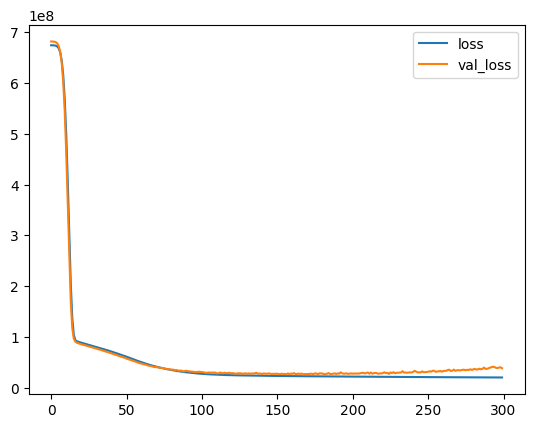

In [718]:
kayipverisi.plot()

In [719]:
tahmindizisi = model.predict(x_test)
tahmindizisi

122/122 [==============================] - 0s 3ms/step


array([[10849.682],
       [27068.682],
       [18135.936],
       ...,
       [14420.334],
       [ 9388.741],
       [27602.104]], dtype=float32)

In [720]:
mean_absolute_error(y_test,tahmindizisi)

4931.376978810824

In [721]:
dataframe.describe() # mesela ortalama fiyat 24000 pound.  ve sapmamız 6470 pound. yani büyük bir sapma var. demekki model aman aman iyi değil.

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


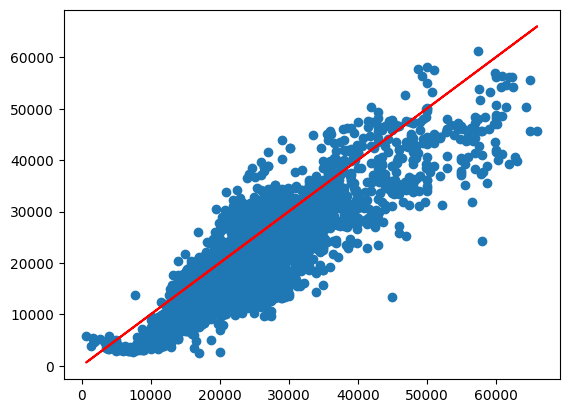

In [722]:
plt.scatter(y_test,tahmindizisi)
plt.plot(y_test,y_test,color = "r")

In [723]:
dataframe.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [724]:
yeniarabasr = dataframe.drop("price",axis=1).iloc[2] 

In [725]:
yeniarabasr

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [726]:
yeniarabasr = scaler.transform(yeniarabasr.values.reshape(-1,5))
model.predict(yeniarabasr)

1/1 [==============================] - 0s 45ms/step


array([[57626.188]], dtype=float32)

## SINIFLANDIRMA VERİLERİ

In [727]:
df11 = pd.read_excel("maliciousornot.xlsx")
df11

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [728]:
df11.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [729]:
df11.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<Axes: xlabel='Type', ylabel='count'>

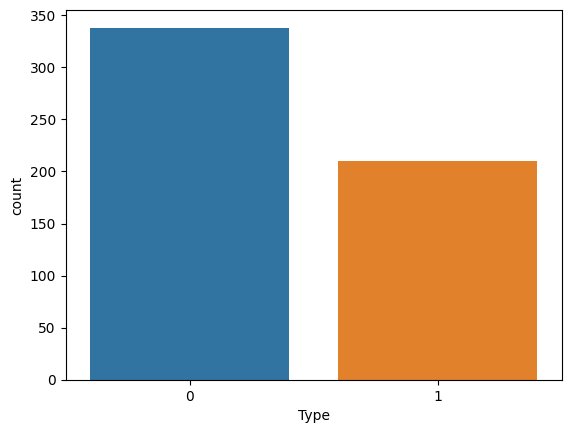

In [730]:
sbn.countplot(x = "Type",data=df11)

<Axes: >

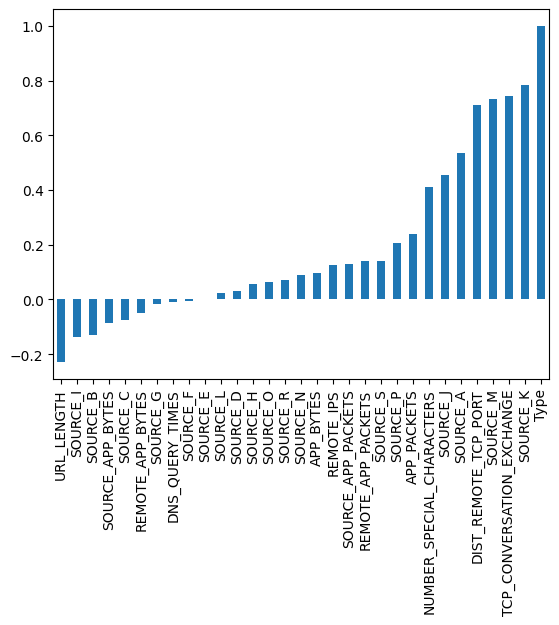

In [731]:
df11.corr()["Type"].sort_values().plot(kind = "bar") # kind ile çeşit belirledik

## sınıflandırma modeli

In [732]:
y = df11["Type"].values
x = df11.drop("Type",axis = 1).values

In [733]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [734]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [735]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [736]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
x_train.shape

(383, 30)

In [737]:
model = Sequential()
model.add(Dense(units=30,activation="relu")) # neden 30 = sizin kaç tane kolonunuz varsa giriş nöron sayısı o kadar olursa iyi olur. genelgeçer bir kural. denemek lazım.
model.add(Dense(units=15,activation="relu")) # 15 
model.add(Dense(units=15,activation="relu")) # 15
model.add(Dense(units=1,activation="sigmoid")) # en son 
model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [738]:
model.fit(x = x_train,y = y_train,epochs=700,validation_data=(x_test,y_test),verbose=1)


Epoch 1/700
12/12 [==============================] - 2s 39ms/step - loss: 0.7010 - val_loss: 0.6937
Epoch 2/700
12/12 [==============================] - 0s 13ms/step - loss: 0.6831 - val_loss: 0.6870
Epoch 3/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6697 - val_loss: 0.6772
Epoch 4/700
12/12 [==============================] - 0s 14ms/step - loss: 0.6552 - val_loss: 0.6625
Epoch 5/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6344 - val_loss: 0.6426
Epoch 6/700
12/12 [==============================] - 0s 13ms/step - loss: 0.6037 - val_loss: 0.6149
Epoch 7/700
12/12 [==============================] - 0s 15ms/step - loss: 0.5650 - val_loss: 0.5769
Epoch 8/700
12/12 [==============================] - 0s 12ms/step - loss: 0.5170 - val_loss: 0.5238
Epoch 9/700
12/12 [==============================] - 0s 15ms/step - loss: 0.4654 - val_loss: 0.4787
Epoch 10/700
12/12 [==============================] - 0s 11ms/step - loss: 0.4113 - val_loss: 0.4266

## erken durma 

In [745]:
model.history.history

{'loss': [0.00010625484719639644], 'val_loss': [0.6345756649971008]}

In [746]:
modelkaybi = pd.DataFrame(model.history.history)

<Axes: >

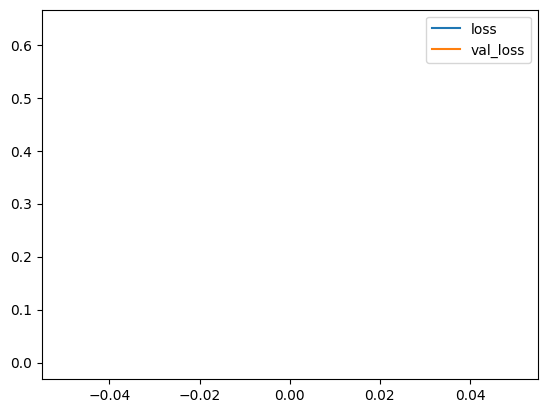

In [747]:
modelkaybi.plot()

In [748]:
earlystopping = EarlyStopping(monitor="val_loss",mode = "min",verbose=1,patience=25)



In [743]:
model.fit(x = x_train,y = y_train,validation_data=(x_test,y_test),verbose=1,callbacks=[earlystopping])


12/12 [==============================] - 0s 21ms/step - loss: 1.0625e-04 - val_loss: 0.6346


<Axes: >

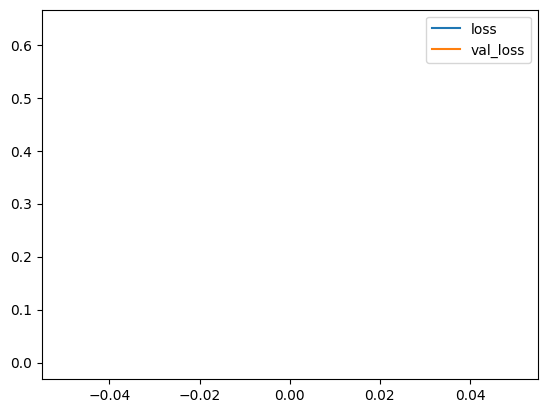

In [744]:
modelkaybi = pd.DataFrame(model.history.history)
modelkaybi.plot()

## DROPOUT